# Assignment 5 DAT341 - spotting cars using convolutional neural networks

### https://www.cse.chalmers.se/~richajo/dit866/assignments/a5/assignment5.html#Programming-assignment-3:-spotting-cars-using-convolutional-neural-networks

### Group Members: Mirco Ghadri, Tobias Filmberg, Sameer Jathavedan

## Data Preprocessing

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [2]:
data_gen = ImageDataGenerator(rescale=1.0/255)
imgdir = 'a5_images' # or wherever you put them...
img_size = 64
batch_size = 32

### Generator for Training Images

In [3]:
train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.


### Generator for Validation(Test) Images

In [4]:
test_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 576 images belonging to 2 classes.


### Testing the train generator to see if it works

In [5]:
Xbatch, Ybatch = train_generator.next()

In [6]:
Xbatch.shape

(32, 64, 64, 3)

The dimensions are:

**32**, because there are 32 images in the batch  
**64**, for the height of each image  
**64**, for the width of each image  
**3**, because for each pixel we store the red, green, and blue value (a value between 0 and 1)  

In [7]:
Ybatch[0]

1.0

[]

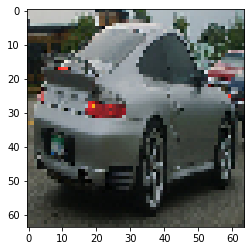

In [8]:
plt.imshow(Xbatch[0])
plt.plot()

## Part 1: Building and Training a convolutional neural network

Write a function **make_convnet()** that builds a convolutional neural network.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [10]:
img_size = 64

def make_convnet():
    model = Sequential([
    #the first convolutional layer has 32 filters, each filter/kernel has the width*height dimension 3*3
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model


### The neural network is made up of convolutional layers as well as pooling layers and lastly dense layers.

**Convolutional layer:** The first convolutional layers takes 4 parameters. The first parameter is the number of filters, the second parameter is the kernel size, which is the width * height dimension of each filter. In our case, the filter dimension is 3 by 3 pixels. The third parameter is the activation function used. We use Relu, which stands for Rectified Linear unit. The ReLU function works my mapping any negative value to 0(including 0) and any positive value to itself. The last parameter is the input shape of the image. Only the first layer in our neural network needs an input shape. This is because the input shape of all other layers are derived from the output shape of the preceeding layer. In our case, the input shape of the first convolutional layer is the image width * image height * 3. This is because each image is represented as a 3 dimensional numpy tensor where there are 64 units for the width of the image, 64 units for the height of the image, and also 3 channels, one for each of the colors Red, Green, and Blue. This is because we are dealing with colored images. A black and white image would only require 1 input channel.

**Filters:** The filters work by scanning the image from left to right, from top to bottom. In each scan, the dot product of the filter matrix and the image patch is taken and added to the resulting output layer/feature map. The feature map can then be used to highlight features such as edges and lines in the image. Initially, the feature matrix is randomly initialized so it does not detect any particular shape or edge. However, as the weights are adjusted through backpropagation, the values in the feature matrix are adapted to detect certain features in the image.

**Pooling layer:** The max pooling layer works on the feature maps that were outputted from the preceeding convolutional layers. It works by identifying the most important pixels in the feature map by using a Max Pooling operation. The max pooling operation uses a 2 * 2 grid that scans the feature map from left to right, top to bottom similar to how the filters in the convolutional layer scan the image. However, instead of taking any dot product, it simply selects the maximum value in the 2 * 2 image patch that it scans and adds it to the output layer. This reduces the dimensions of the output layer and thus reduces the total number of weights that need to be trained in the cnn. Another advantage is that the max pooling operation makes the cnn more robust and immune to translational variance in the image. This is because it selects the maximum value in the 2 * 2 image patch that it scans. This makes the model less sensitive to individual pixels in the image and thus more translationally invariant.

**Flatten**: Since the output from the last Max Pooling layer is a 3 dimensional tensor of shape (6 * 6 * 128), the flatten layer will flatten this output into a 1 dimensional array. This is because the dense layer can only take a 1 dimensional input array.

**Dense Layer:** The dense layers are fully connected layers. Each neuron in a dense layer is connected to all neurons in the preceding layer.

**Optimizer(Adam):** Adam stands for Adaptive Moment Estimation and is a Stochastic Gradient Descent(SGD) algorithm used to update and optimize the weights in a neural network.

**loss='binary_crossentropy':** Binary crossentropy loss measures how off the prediction was from the real value. It is useful for binary classification tasks. The more off the prediction was from the real value(y), the higher the loss will be. The objective function of the CNN is to minimize the total loss.

In [11]:
model = make_convnet()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

### Training the model

In [134]:
history = model.fit( 
        train_generator,
        epochs=10,
        validation_data = test_generator
        )


Epoch 1/10
50/50 [==============================] - 5s 81ms/step - loss: 0.6847 - accuracy: 0.5562 - val_loss: 0.6724 - val_accuracy: 0.6788
Epoch 2/10
50/50 [==============================] - 4s 80ms/step - loss: 0.5777 - accuracy: 0.7106 - val_loss: 0.6262 - val_accuracy: 0.7066
Epoch 3/10
50/50 [==============================] - 4s 79ms/step - loss: 0.4867 - accuracy: 0.7675 - val_loss: 0.6322 - val_accuracy: 0.6997
Epoch 4/10
50/50 [==============================] - 4s 83ms/step - loss: 0.4275 - accuracy: 0.8075 - val_loss: 0.5125 - val_accuracy: 0.7691
Epoch 5/10
50/50 [==============================] - 5s 103ms/step - loss: 0.4097 - accuracy: 0.8069 - val_loss: 0.4781 - val_accuracy: 0.7812
Epoch 6/10
50/50 [==============================] - 6s 114ms/step - loss: 0.3529 - accuracy: 0.8462 - val_loss: 0.4775 - val_accuracy: 0.7795
Epoch 7/10
50/50 [==============================] - 7s 136ms/step - loss: 0.3178 - accuracy: 0.8656 - val_loss: 0.5205 - val_accuracy: 0.7674
Epoch 8/10

In [12]:
#model.save_weights("weights")
#model.load_weights("weights")

In [13]:
model.evaluate(test_generator)

18/18 [==============================] - 6s 297ms/step - loss: 0.5422 - accuracy: 0.7292


[0.5422251224517822, 0.7291666865348816]

### Training vs Testing accuracy over 10 epochs

In [144]:
def make_plot(h):
    n_epochs = list(range(1,11))
    training_accuracy = h.history["accuracy"]
    test_accuracy = h.history["val_accuracy"]
    plt.figure(figsize=(8,5))
    plt.plot(n_epochs, training_accuracy, label="Training accuracy")
    plt.plot(n_epochs, test_accuracy, label="Testing accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

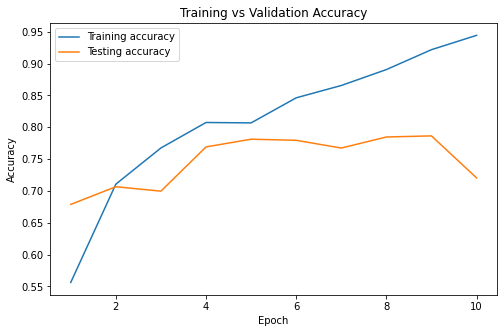

In [145]:
make_plot(history)

### Augmented Training Data Generator

We used 3 additional parameters for augmenting the images in the ImageDataGenerator. These were horizontal_flip which mirrors the image horizontally, rotation_range which rotates the image randomly by up to 5 degrees and channel_shift_range which shifts the pixel values in each of the color channels randomly by up to 5 units. The reason we used such small values for rotation range and channel_shift_range was because we tried larger values at first(20), however the result was not good. The training accuracy became very low(underfitting) and the validation accuracy also dropped a lot. The reason can be that the images became too distorted so they became meaningless to the model and no longer looked like a car. Therefore, we had to find a fine balance and the value 5 was good, since the training accuracy did not drop that much and the validation accuracy increased.

In [146]:
data_gen_augmented = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, rotation_range=5, channel_shift_range=5)
                                       
train_generator_augmented = data_gen_augmented.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.


In [147]:
Xbatch_augmented, Ybatch_augmented = train_generator_augmented.next()

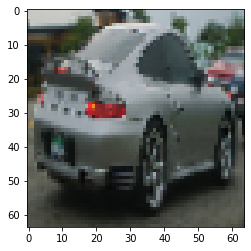

In [148]:
plt.imshow(Xbatch_augmented[0])

In [149]:
model = make_convnet()
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 6, 6, 128)      

In [150]:
history_augmented = model.fit( 
        train_generator_augmented,
        epochs=10,
        validation_data = test_generator
        )

Epoch 1/10
50/50 [==============================] - 7s 119ms/step - loss: 0.6826 - accuracy: 0.5706 - val_loss: 0.6765 - val_accuracy: 0.5729
Epoch 2/10
50/50 [==============================] - 6s 115ms/step - loss: 0.5877 - accuracy: 0.6819 - val_loss: 0.5632 - val_accuracy: 0.7153
Epoch 3/10
50/50 [==============================] - 6s 114ms/step - loss: 0.5137 - accuracy: 0.7631 - val_loss: 0.5402 - val_accuracy: 0.7170
Epoch 4/10
50/50 [==============================] - 6s 115ms/step - loss: 0.5117 - accuracy: 0.7563 - val_loss: 0.5288 - val_accuracy: 0.7569
Epoch 5/10
50/50 [==============================] - 6s 116ms/step - loss: 0.4631 - accuracy: 0.7844 - val_loss: 0.5125 - val_accuracy: 0.7604
Epoch 6/10
50/50 [==============================] - 6s 116ms/step - loss: 0.4357 - accuracy: 0.7975 - val_loss: 0.5307 - val_accuracy: 0.7639
Epoch 7/10
50/50 [==============================] - 6s 116ms/step - loss: 0.4096 - accuracy: 0.8119 - val_loss: 0.4706 - val_accuracy: 0.7795
Epoch 

In [151]:
model.evaluate(test_generator)

18/18 [==============================] - 1s 33ms/step - loss: 0.4882 - accuracy: 0.7899


[0.48824775218963623, 0.7899305820465088]

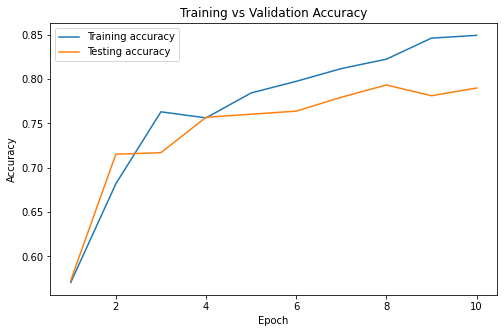

In [152]:
make_plot(history_augmented)

### Q: Do you see any difference between the training and validation accuracy when training the model with the augmented training dataset?

There is a slight difference on the training and validation accuracy when using data augmentation on the training set and then training the model with the augmented training set. The total difference between the training and testing accuracy throughout the 10 epochs becomes generally smaller. However, when training the CNN with the regular image data generator, it reached a much higher final training accuracy(95%). When training the CNN with the augmented image data generator it reached a lower final training accuracy of 85%. Also, the final validation accuracy of training the model with an augmented image data generator was higher(79%) then the final validation accuracy of training the CNN model with a regular image data generator (72%). This makes sense since the augmented training data introduces more variation into the training data and combats overfitting.

## VGG-16

In [36]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

In [37]:
vggmodel = applications.VGG16(weights='imagenet', include_top=True)

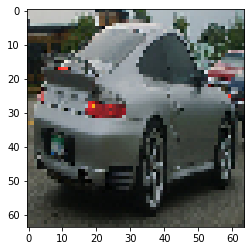

In [38]:
plt.imshow(Xbatch[0])

In [39]:
#loading the image
image = load_img("a5_images/train/car/0001.jpg", target_size=(224,224))
#loading the image
#image = load_img("a5_images/train/car/0003.jpg", target_size=(224,224))

In [40]:
#converting the image to a numpy arary
image_array = img_to_array(image)

In [41]:
#preprocess the array and return a new processed array
image_array = preprocess_input(image_array)

In [42]:
#reshape the image array into a 4-dimensional numpy array
image_array = image_array.reshape(1,224,224,3)

In [43]:
prediction = vggmodel.predict(image_array)

1/1 [==============================] - 0s 265ms/step


In [44]:
decode_predictions(prediction)

[[('n03095699', 'container_ship', 0.121823765),
  ('n04149813', 'scoreboard', 0.076020464),
  ('n03196217', 'digital_clock', 0.054478724),
  ('n03733281', 'maze', 0.031015785),
  ('n06874185', 'traffic_light', 0.028449677)]]

### Q: Does the prediction make sense?

The prediction does not make sense, since the image we are predicting is a car. None of the prediction labels mention car. However, the prediction label with highest probability is container ship. This prediction is more similar to a car than the other predictions(scoreboard, digital_clock, maze and traffic light). One of the reasons the prediction is so off, even though VGG16 is a very advanced and accurate model, can be because the input image is originally 26 * 56 pixels dimensions. The image has to be heavily resized(scaled up) in order to get the dimension 224 * 224 which the VGG16 CNN can work with. During this resizing process, the image may become so distorted that it no longer looks like a car. We tested this hypothesis by providing the model with another image of a car, but which had higher dimensions and more similar to the 224 * 224 dimensions that VGG-16 model uses. Image 0003.jpg in train/car had the dimensions 500 * 264. When we fed this image to the VGG16-model, all of the output classifications were more or less related to a car: "minivan", "beach_wagon", "pickup","golfcart","car_wheel".

## Part 3: Using VGG-16 as a feature extractor


In [45]:
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))

In [46]:
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [47]:
import numpy as np

In [48]:
def create_vgg16_features(directory, filename):
    #generator that creates batches of images from the training folder or validation folder
    generator = vgg_data_gen.flow_from_directory(
        imgdir + directory,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)
    #uses the VGG16 model to extract features
    features = feature_extractor.predict(generator)
    #save the features into a numpy array
    with open(filename, 'wb') as f:
      np.save(f, features) 
    #return features

### Creates the feature vector for the training images

In [49]:
create_vgg16_features("/train", "train_features")

Found 1600 images belonging to 2 classes.
50/50 [==============================] - 17s 333ms/step


### Creates the feature vector for the validation images

In [50]:
create_vgg16_features("/validation","test_features")

Found 576 images belonging to 2 classes.
18/18 [==============================] - 6s 343ms/step


In [55]:
def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))

def train_on_cnnfeatures():
    with open("train_features", 'rb') as f:
        train_features = np.load(f)
    with open("test_features","rb") as f:
        test_features = np.load(f)
    model = Sequential([
    Flatten(input_shape = train_features.shape[1:]),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(train_features,get_labels(1600), epochs=10)
    model.evaluate(test_features, get_labels(576))

In [56]:
train_on_cnnfeatures()

Epoch 1/10
50/50 [==============================] - 0s 2ms/step - loss: 1.2640 - accuracy: 0.8425
Epoch 2/10
50/50 [==============================] - 0s 2ms/step - loss: 0.1117 - accuracy: 0.9569
Epoch 3/10
50/50 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.9912
Epoch 4/10
50/50 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9981
Epoch 5/10
50/50 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9994
Epoch 6/10
50/50 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 8/10
50/50 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 9/10
50/50 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 10/10
18/18 [==============================] - 0s 1ms/step - loss: 0.6271 - accuracy: 0.8941


### Q: What is your accuracy this time? If the accuracy is different from when you trained your previous CNN, what do you think is the reason for the difference?

The accuracy when integrating the VGG-16 model into our neural network is now 100% for the training set and 90% for the validation set. The accuracy is much higher when integrating the VGG-16 model into our neural network. This is because the output of the VGG-16 model, which is an advanced model trained on a very large dataset of images, is fed to our neural network as a feature vector. This feature vector is then fed through 2 dense layers which classify the image as either a car or other. By using this architecture of transfer learning, we can use an advanced and pretrained model inside of our neural network. The VGG16 model does all of the heavy work, while the 2 dense layers in the end simply classify the image as car or other.

## Part 4: Visualizing the learned features

In [64]:
first_layer_weights = vggmodel.get_weights()[0]
first_layer_weights.shape

(3, 3, 3, 64)

### The first filter in the convolutional layer. It has 3 channels, one for each color

In [65]:
first_layer_weights[:,:,:,0]

array([[[ 0.42947057,  0.55037946,  0.4800154 ],
        [ 0.373467  ,  0.44007453,  0.4085474 ],
        [-0.06136011, -0.08138704, -0.06514555]],

       [[ 0.27476987,  0.34573907,  0.31047726],
        [ 0.03868078,  0.04063221,  0.05020237],
        [-0.36722335, -0.4535013 , -0.40338343]],

       [[-0.05746817, -0.05863491, -0.05087169],
        [-0.26224968, -0.33066967, -0.2852275 ],
        [-0.35009676, -0.4850302 , -0.41851634]]], dtype=float32)

In [66]:
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

In [69]:
kernel_image(first_layer_weights,0,True)[0]

array([[ 0.78031725,  1.        ,  0.8721536 ],
       [ 0.67856276,  0.79958385,  0.74230134],
       [-0.        , -0.        , -0.        ]], dtype=float32)

In [96]:
def visualize_filter(n):
    fig = plt.figure(figsize=(6,4),dpi=100)
    fig.add_subplot(1,2,1)
    plt.imshow(kernel_image(first_layer_weights,n,True))
    fig.add_subplot(1,2,2)
    plt.imshow(kernel_image(first_layer_weights,n,False))
    plt.plot()

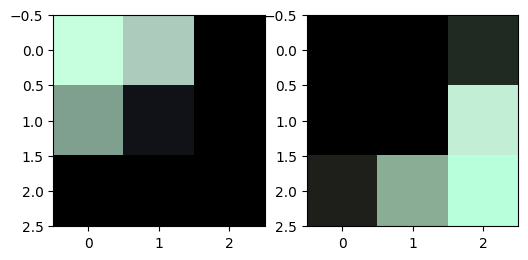

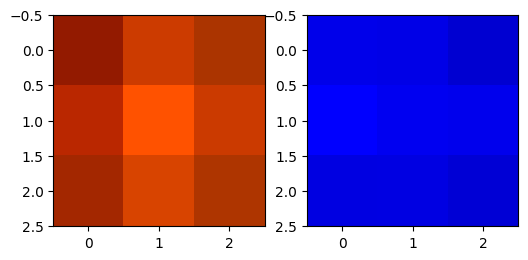

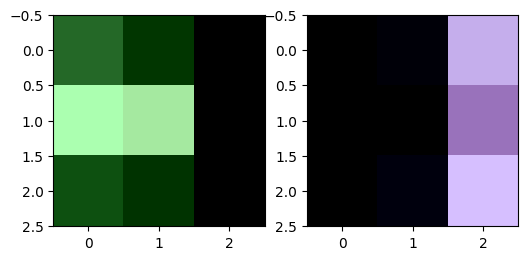

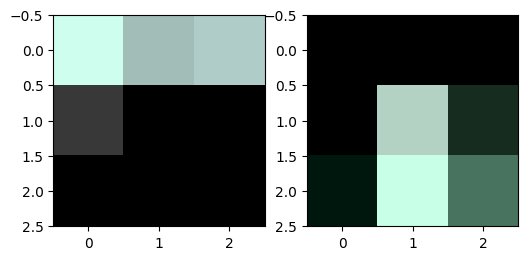

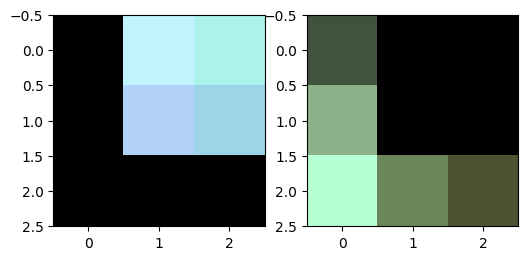

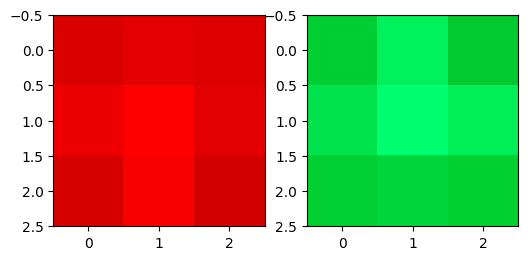

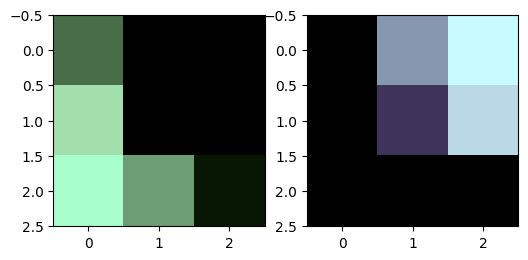

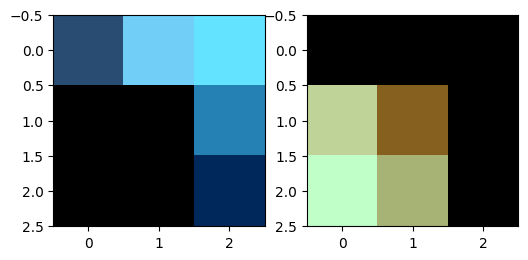

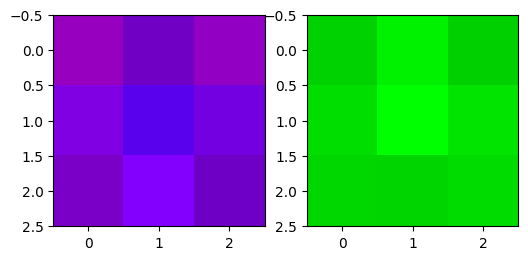

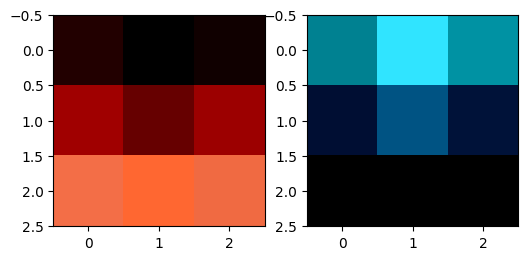

In [97]:
for i in range(10):
    visualize_filter(i)

We can see that each filter matrix is made up of different colors and patterns. The images represent different patterns that the filter matrix is looking for in the image. For example, the first filter matrix is looking for a light green edge in the image.